In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC 
import numpy as np
import matplotlib.pyplot as plt         
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [6]:
iris = load_iris()
X_iris = iris.data[:, :2] 
y_iris = iris.target
(X_train, X_test, y_train, y_test ) = train_test_split(X_iris, y_iris, stratify=y_iris, test_size= 0.3, random_state=25)


In [11]:
#Create estimator class
estimator =SVC(kernel='rbf')

#Create param grid
paramgrid =  [{'C':[0.01,0.1,1,5,10], 'gamma':[00.5, 1,2,3,4]}]

#Create SearchGridCV optimizer
optimizer = GridSearchCV(estimator, paramgrid, cv=10, scoring= "accuracy")

#Fit it for original data
optt=optimizer.fit(X_train, y_train)
y_pred = optt.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [8]:
 print(classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.85      0.73      0.79        15
  virginica       0.76      0.87      0.81        15

avg / total       0.87      0.87      0.87        45



In [12]:
optt.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

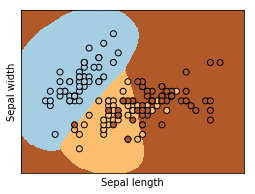

In [9]:
x_min, x_max = X_iris[:, 0].min() - .5, X_iris[:, 0].max() + .5
y_min, y_max = X_iris[:, 1].min() - .5, X_iris[:, 1].max() + .5
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

y_pred = optimizer.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
y_pred = y_pred.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, y_pred, cmap=plt.cm.Paired)


# Plot also the training points
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

# polynomial kernel

In [17]:
#Create estimator class
estimator_poly =SVC(kernel='poly')

#Create param grid
paramgrid =  [{'C':[0.01,0.1,1,5,10], 'degree':[1,2,3,4,5]}]

#Create SearchGridCV optimizer
optimizer = GridSearchCV(estimator_poly, paramgrid, cv=10, scoring= "accuracy")

#Fit it for original data
optt=optimizer.fit(X_train, y_train)
y_pred = optt.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [18]:
 print(classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.80      0.80      0.80        15
  virginica       0.80      0.80      0.80        15

avg / total       0.87      0.87      0.87        45



In [19]:
optt.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

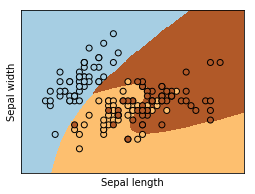

In [21]:
x_min, x_max = X_iris[:, 0].min() - .5, X_iris[:, 0].max() + .5
y_min, y_max = X_iris[:, 1].min() - .5, X_iris[:, 1].max() + .5
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

y_pred = optt.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
y_pred = y_pred.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, y_pred, cmap=plt.cm.Paired)


# Plot also the training points
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()